In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import plotly.express as px
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/tech-jobs/tech_us_jobs.csv


In [2]:
df = pd.read_csv('../input/tech-jobs/tech_us_jobs.csv')
df.head(5)

,title,company,salary,summary,location,date,rating
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.","From $75,000 a year",Job Title: Full Stack Developer (Javascript)De...,+1 locationRemote,EmployerActive 2 days ago,NaN
1,newVueJS Front-end Developer,THH LLC,"$70,000 - $105,000 a year",Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.3
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,"$70,000 - $100,000 a year",You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,NaN
3,newRemote Full Stack Javascript Developer,Sandbox Apps Inc.,"$44,470 - $65,000 a year",Extending the digital shopping experience from...,Remote,PostedToday,NaN
4,Web Developer / HTML,Phoenix Technology Partners,NaN,"Build applications using HTML, CSS, and JavaSc...","New York, NY",Posted30+ days ago,NaN


In [3]:
for col in df.columns:
    print(col)

title
company
salary
summary
location
date
rating


In [4]:
df.isna().sum()

title          0
company        0
salary      2691
summary        0
location       0
date           0
rating      3357
dtype: int64

In [5]:
df.shape

(6780, 7)

In [6]:
# Missing value imputation where it makes sense
mean = df['rating'].mean() #imputing item_weight with mean
df['salary'].fillna(mean, inplace =True)

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique())

title
['Full Stack Developer (JavaScript)' 'newVueJS Front-end Developer'
 'Front-end developer (HTML, CSS, JavaScript)'
 'newRemote Full Stack Javascript Developer' 'Web Developer / HTML'
 'newJavaScript Developer' 'newREMOTE Full Stack Javascript Developer'
 'Frontend Developer' 'React JS Developer' 'newHTML Developer'
 'Remote JavaScript Developer' 'Junior Front End Developer'
 'newEntry Level Front End Developer: 2022' 'newJunior UI Developer'
 'newReact JS Developer' 'newWeb Developer' 'Software Developer'
 'Jr. Front End Developer' 'newJava Developer - Entry Level'
 'newSenior Full Stack Developer' 'Front End Developer - Returnship'
 'Front-End Web Developer Trainee' 'UI Developer'
 'newBackend Developer (100% Remote)'
 'newMultidisciplinary Web Application Developer'
 'Software Developer – Entry Level'
 'newFullstack Developer (ReactJs & NodeJs)' 'Web Developer (Part-Time)'
 'JavaScript Developer' 'CAD Automations Engineer'
 'Senior CRM Backend Developer (NEW YORK) ONSITE ONLY A

In [8]:
df.dtypes

title        object
company      object
salary       object
summary      object
location     object
date         object
rating      float64
dtype: object

In [9]:
df['title'] = df['title'].astype('str') 
df.dtypes

title        object
company      object
salary       object
summary      object
location     object
date         object
rating      float64
dtype: object

In [10]:
df.head()

,title,company,salary,summary,location,date,rating
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.","From $75,000 a year",Job Title: Full Stack Developer (Javascript)De...,+1 locationRemote,EmployerActive 2 days ago,NaN
1,newVueJS Front-end Developer,THH LLC,"$70,000 - $105,000 a year",Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.3
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,"$70,000 - $100,000 a year",You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,NaN
3,newRemote Full Stack Javascript Developer,Sandbox Apps Inc.,"$44,470 - $65,000 a year",Extending the digital shopping experience from...,Remote,PostedToday,NaN
4,Web Developer / HTML,Phoenix Technology Partners,3.889454,"Build applications using HTML, CSS, and JavaSc...","New York, NY",Posted30+ days ago,NaN


In [11]:
# Fixing the title column
for i in df.index:
    val = df['title'].iloc[i]
    if val[0:3] == 'new':
        df.at[i, 'title'] = df.at[i, 'title'][3:]
    else:
        pass
df.head(10)

,title,company,salary,summary,location,date,rating
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.","From $75,000 a year",Job Title: Full Stack Developer (Javascript)De...,+1 locationRemote,EmployerActive 2 days ago,NaN
1,VueJS Front-end Developer,THH LLC,"$70,000 - $105,000 a year",Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.3
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,"$70,000 - $100,000 a year",You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,NaN
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,"$44,470 - $65,000 a year",Extending the digital shopping experience from...,Remote,PostedToday,NaN
4,Web Developer / HTML,Phoenix Technology Partners,3.889454,"Build applications using HTML, CSS, and JavaSc...","New York, NY",Posted30+ days ago,NaN
5,JavaScript Developer,X2logicsstaffingsolution,"$100,000 - $130,000 a year",Design video and voice solutions leveraging We...,"Austin, TX",PostedToday,NaN
6,REMOTE Full Stack Javascript Developer,Piper Companies,"$105,000 - $140,000 a year",The REMOTE Full Stack Javascript Developer wil...,+13 locationsRemote,Posted3 days ago,4.5
7,Frontend Developer,GRANDMETRIC,"$11,000 - $16,000 a month","Our main focus is a booking system, that allow...","Remote in Lewes, DE",Posted19 days ago,NaN
8,React JS Developer,TETCHTECH INC,$24 - $35 an hour,"Job Types: Full-time, Part-time, Contract.Part...",Remote,EmployerActive 7 days ago,NaN
9,HTML Developer,"Woongjin, Inc",3.889454,Check the hand off for creative asset from Cli...,"Ridgefield Park, NJ",Posted2 days ago,3.6


In [12]:
df['salaries'] = None

In [13]:
index_salary = df.columns.get_loc('salary')
index_salaries= df.columns.get_loc('salaries')

In [14]:
c = ['ID','Income']
d = list(range(1, len(df)+ 1))

for row in range(0, len(df)):
    d[row] = [row, df.iat[row, index_salary]]

In [15]:
data = pd.DataFrame(d,columns=c)

In [16]:
# Creating a new column with integer values for the annual salary based on averages
data['Income1'] = data['Income'].astype(str).str.lower() 
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","from $75,000 a year"
1,1,"$70,000 - $105,000 a year","$70,000 - $105,000 a year"
2,2,"$70,000 - $100,000 a year","$70,000 - $100,000 a year"
3,3,"$44,470 - $65,000 a year","$44,470 - $65,000 a year"
4,4,3.889454,3.8894536955887364
5,5,"$100,000 - $130,000 a year","$100,000 - $130,000 a year"
6,6,"$105,000 - $140,000 a year","$105,000 - $140,000 a year"
7,7,"$11,000 - $16,000 a month","$11,000 - $16,000 a month"
8,8,$24 - $35 an hour,$24 - $35 an hour
9,9,3.889454,3.8894536955887364


In [17]:
data['Income1'].replace({'n/a' : '0', '':'0', '-':'0', 0:'0'}, regex=False, inplace=True)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","from $75,000 a year"
1,1,"$70,000 - $105,000 a year","$70,000 - $105,000 a year"
2,2,"$70,000 - $100,000 a year","$70,000 - $100,000 a year"
3,3,"$44,470 - $65,000 a year","$44,470 - $65,000 a year"
4,4,3.889454,3.8894536955887364
5,5,"$100,000 - $130,000 a year","$100,000 - $130,000 a year"
6,6,"$105,000 - $140,000 a year","$105,000 - $140,000 a year"
7,7,"$11,000 - $16,000 a month","$11,000 - $16,000 a month"
8,8,$24 - $35 an hour,$24 - $35 an hour
9,9,3.889454,3.8894536955887364


In [18]:
data['Income1'].replace({np.nan: 0,'from': '', 'to': '+', '-': '+', ' a year': ''}, regex=True, inplace=True)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","$75,000"
1,1,"$70,000 - $105,000 a year","$70,000 + $105,000"
2,2,"$70,000 - $100,000 a year","$70,000 + $100,000"
3,3,"$44,470 - $65,000 a year","$44,470 + $65,000"
4,4,3.889454,3.8894536955887364
5,5,"$100,000 - $130,000 a year","$100,000 + $130,000"
6,6,"$105,000 - $140,000 a year","$105,000 + $140,000"
7,7,"$11,000 - $16,000 a month","$11,000 + $16,000 a month"
8,8,$24 - $35 an hour,$24 + $35 an hour
9,9,3.889454,3.8894536955887364


In [19]:
data['Income1'].replace(' an hour', ' * 12 * 52', regex=True, inplace=True)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","$75,000"
1,1,"$70,000 - $105,000 a year","$70,000 + $105,000"
2,2,"$70,000 - $100,000 a year","$70,000 + $100,000"
3,3,"$44,470 - $65,000 a year","$44,470 + $65,000"
4,4,3.889454,3.8894536955887364
5,5,"$100,000 - $130,000 a year","$100,000 + $130,000"
6,6,"$105,000 - $140,000 a year","$105,000 + $140,000"
7,7,"$11,000 - $16,000 a month","$11,000 + $16,000 a month"
8,8,$24 - $35 an hour,$24 + $35 * 12 * 52
9,9,3.889454,3.8894536955887364


In [20]:
data['Income1'].replace(' a month', ' * 12', regex=True, inplace=True)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","$75,000"
1,1,"$70,000 - $105,000 a year","$70,000 + $105,000"
2,2,"$70,000 - $100,000 a year","$70,000 + $100,000"
3,3,"$44,470 - $65,000 a year","$44,470 + $65,000"
4,4,3.889454,3.8894536955887364
5,5,"$100,000 - $130,000 a year","$100,000 + $130,000"
6,6,"$105,000 - $140,000 a year","$105,000 + $140,000"
7,7,"$11,000 - $16,000 a month","$11,000 + $16,000 * 12"
8,8,$24 - $35 an hour,$24 + $35 * 12 * 52
9,9,3.889454,3.8894536955887364


In [21]:
data.loc[data.astype(str).Income1.str.contains('\+'),'Income1'] = '(' + data['Income1'].astype(str) + ') / 2'
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year","$75,000"
1,1,"$70,000 - $105,000 a year","($70,000 + $105,000) / 2"
2,2,"$70,000 - $100,000 a year","($70,000 + $100,000) / 2"
3,3,"$44,470 - $65,000 a year","($44,470 + $65,000) / 2"
4,4,3.889454,3.8894536955887364
5,5,"$100,000 - $130,000 a year","($100,000 + $130,000) / 2"
6,6,"$105,000 - $140,000 a year","($105,000 + $140,000) / 2"
7,7,"$11,000 - $16,000 a month","($11,000 + $16,000 * 12) / 2"
8,8,$24 - $35 an hour,($24 + $35 * 12 * 52) / 2
9,9,3.889454,3.8894536955887364


In [22]:
data['Income1'] = data['Income1'].str.replace('$', '')
data.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,ID,Income,Income1
0,0,"From $75,000 a year","75,000"
1,1,"$70,000 - $105,000 a year","(70,000 + 105,000) / 2"
2,2,"$70,000 - $100,000 a year","(70,000 + 100,000) / 2"
3,3,"$44,470 - $65,000 a year","(44,470 + 65,000) / 2"
4,4,3.889454,3.8894536955887364
5,5,"$100,000 - $130,000 a year","(100,000 + 130,000) / 2"
6,6,"$105,000 - $140,000 a year","(105,000 + 140,000) / 2"
7,7,"$11,000 - $16,000 a month","(11,000 + 16,000 * 12) / 2"
8,8,$24 - $35 an hour,(24 + 35 * 12 * 52) / 2
9,9,3.889454,3.8894536955887364


In [23]:
data['Income1'] = data['Income1'].str.replace(',', '')
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000
1,1,"$70,000 - $105,000 a year",(70000 + 105000) / 2
2,2,"$70,000 - $100,000 a year",(70000 + 100000) / 2
3,3,"$44,470 - $65,000 a year",(44470 + 65000) / 2
4,4,3.889454,3.8894536955887364
5,5,"$100,000 - $130,000 a year",(100000 + 130000) / 2
6,6,"$105,000 - $140,000 a year",(105000 + 140000) / 2
7,7,"$11,000 - $16,000 a month",(11000 + 16000 * 12) / 2
8,8,$24 - $35 an hour,(24 + 35 * 12 * 52) / 2
9,9,3.889454,3.8894536955887364


In [24]:
data['Income1'] = data['Income1'].astype(str)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000
1,1,"$70,000 - $105,000 a year",(70000 + 105000) / 2
2,2,"$70,000 - $100,000 a year",(70000 + 100000) / 2
3,3,"$44,470 - $65,000 a year",(44470 + 65000) / 2
4,4,3.889454,3.8894536955887364
5,5,"$100,000 - $130,000 a year",(100000 + 130000) / 2
6,6,"$105,000 - $140,000 a year",(105000 + 140000) / 2
7,7,"$11,000 - $16,000 a month",(11000 + 16000 * 12) / 2
8,8,$24 - $35 an hour,(24 + 35 * 12 * 52) / 2
9,9,3.889454,3.8894536955887364


In [25]:
data['Income1'].replace(' a week', ' * 52', regex=True, inplace=True)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000
1,1,"$70,000 - $105,000 a year",(70000 + 105000) / 2
2,2,"$70,000 - $100,000 a year",(70000 + 100000) / 2
3,3,"$44,470 - $65,000 a year",(44470 + 65000) / 2
4,4,3.889454,3.8894536955887364
5,5,"$100,000 - $130,000 a year",(100000 + 130000) / 2
6,6,"$105,000 - $140,000 a year",(105000 + 140000) / 2
7,7,"$11,000 - $16,000 a month",(11000 + 16000 * 12) / 2
8,8,$24 - $35 an hour,(24 + 35 * 12 * 52) / 2
9,9,3.889454,3.8894536955887364


In [26]:
data['Income1'] = data['Income1'].str.replace('up', '')
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000
1,1,"$70,000 - $105,000 a year",(70000 + 105000) / 2
2,2,"$70,000 - $100,000 a year",(70000 + 100000) / 2
3,3,"$44,470 - $65,000 a year",(44470 + 65000) / 2
4,4,3.889454,3.8894536955887364
5,5,"$100,000 - $130,000 a year",(100000 + 130000) / 2
6,6,"$105,000 - $140,000 a year",(105000 + 140000) / 2
7,7,"$11,000 - $16,000 a month",(11000 + 16000 * 12) / 2
8,8,$24 - $35 an hour,(24 + 35 * 12 * 52) / 2
9,9,3.889454,3.8894536955887364


In [27]:
for col in data.columns:
    print(col)
    print(data[col].unique())

ID
[   0    1    2 ... 6777 6778 6779]
Income
['From $75,000 a year' '$70,000 - $105,000 a year'
 '$70,000 - $100,000 a year' '$44,470 - $65,000 a year' 3.8894536955887364
 '$100,000 - $130,000 a year' '$105,000 - $140,000 a year'
 '$11,000 - $16,000 a month' '$24 - $35 an hour'
 '$100,000 - $120,000 a year' '$32 - $35 an hour' '$80 - $100 an hour'
 '$60,000 - $90,000 a year' '$70,000 - $80,000 a year'
 '$22.50 - $37.50 an hour' '$60 - $80 an hour' '$55,000 - $60,000 a year'
 '$130,000 - $180,000 a year' '$58.75 an hour' '$50 an hour'
 '$75,000 - $95,000 a year' '$95 - $145 an hour'
 '$140,000 - $180,000 a year' '$18 - $25 an hour'
 '$50,000 - $65,000 a year' '$87,294 - $140,977 a year' '$110,000 a year'
 '$100,000 - $200,000 a year' '$88,000 - $192,000 a year'
 'From $70,000 a year' '$68,610 - $157,498 a year'
 '$96,000 - $138,000 a year' '$75,000 - $90,000 a year'
 '$120,000 - $150,000 a year' 'Up to $25 an hour' '$16 - $20 an hour'
 '$50 - $63 an hour' 'Up to $110,000 a year' '$120,

In [28]:
data['Income1'] = data['Income1'].apply(lambda x: eval(x) if (pd.notnull(x)) else x)
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000.000000
1,1,"$70,000 - $105,000 a year",87500.000000
2,2,"$70,000 - $100,000 a year",85000.000000
3,3,"$44,470 - $65,000 a year",54735.000000
4,4,3.889454,3.889454
5,5,"$100,000 - $130,000 a year",115000.000000
6,6,"$105,000 - $140,000 a year",122500.000000
7,7,"$11,000 - $16,000 a month",101500.000000
8,8,$24 - $35 an hour,10932.000000
9,9,3.889454,3.889454


In [29]:
data.head(50)

,ID,Income,Income1
0,0,"From $75,000 a year",75000.000000
1,1,"$70,000 - $105,000 a year",87500.000000
2,2,"$70,000 - $100,000 a year",85000.000000
3,3,"$44,470 - $65,000 a year",54735.000000
4,4,3.889454,3.889454
5,5,"$100,000 - $130,000 a year",115000.000000
6,6,"$105,000 - $140,000 a year",122500.000000
7,7,"$11,000 - $16,000 a month",101500.000000
8,8,$24 - $35 an hour,10932.000000
9,9,3.889454,3.889454


In [30]:
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
locations = df['location']
locations.head(10)

0      +1 locationRemote
1                 Remote
2                 Remote
3                 Remote
4           New York, NY
5             Austin, TX
6    +13 locationsRemote
7    Remote in Lewes, DE
8                 Remote
9    Ridgefield Park, NJ
Name: location, dtype: object

In [31]:
# Dictionary of US states to clean the 'location' column
def us_state(x):
    states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'Remote']
    for i in states:
        if i in x:
            return i


df['location'] = df['location'].apply(us_state)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.","From $75,000 a year",Job Title: Full Stack Developer (Javascript)De...,Remote,EmployerActive 2 days ago,NaN,None
1,VueJS Front-end Developer,THH LLC,"$70,000 - $105,000 a year",Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.3,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,"$70,000 - $100,000 a year",You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,NaN,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,"$44,470 - $65,000 a year",Extending the digital shopping experience from...,Remote,PostedToday,NaN,None
4,Web Developer / HTML,Phoenix Technology Partners,3.889454,"Build applications using HTML, CSS, and JavaSc...",NY,Posted30+ days ago,NaN,None
5,JavaScript Developer,X2logicsstaffingsolution,"$100,000 - $130,000 a year",Design video and voice solutions leveraging We...,TX,PostedToday,NaN,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,"$105,000 - $140,000 a year",The REMOTE Full Stack Javascript Developer wil...,Remote,Posted3 days ago,4.5,None
7,Frontend Developer,GRANDMETRIC,"$11,000 - $16,000 a month","Our main focus is a booking system, that allow...",DE,Posted19 days ago,NaN,None
8,React JS Developer,TETCHTECH INC,$24 - $35 an hour,"Job Types: Full-time, Part-time, Contract.Part...",Remote,EmployerActive 7 days ago,NaN,None
9,HTML Developer,"Woongjin, Inc",3.889454,Check the hand off for creative asset from Cli...,NJ,Posted2 days ago,3.6,None


In [32]:
df['location'].value_counts()

Remote    2590
CA         819
NY         376
TX         354
WA         287
NJ         266
IL         208
GA         188
DC         164
OR         136
MD         119
FL         118
NC          96
MA          83
MN          72
CT          71
DE          65
AL          63
ID          60
RI          58
IA          56
TN          55
NM          53
VA          51
UT          28
OK          25
CO          23
IN          16
PA          15
MI          14
OH          13
VT           9
AK           8
AZ           6
WI           5
ME           3
LA           2
KS           1
MO           1
KY           1
Name: location, dtype: int64

<AxesSubplot:>

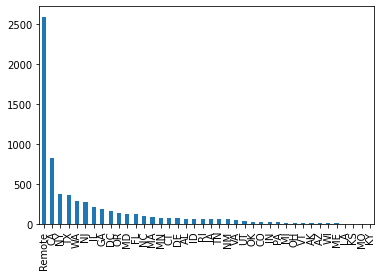

In [33]:
df['location'].value_counts().plot(kind='bar')
# Many remote positions, California is the most frequent state

In [34]:
pd.set_option("display.max_rows", None)

In [35]:
df['company'].value_counts()

Microsoft                                             198
Woongjin, Inc                                         157
Piper Companies                                       137
Oracle                                                120
Integration Developer Network LLC                     118
Cyber Wave LLC                                        115
NIKE INC                                               96
Paramount                                              71
X2logicsstaffingsolution                               65
WorkCog                                                63
ClimateAI                                              63
GRANDMETRIC                                            62
Northwestern Medicine                                  62
Sandbox Apps Inc.                                      61
Boston Harbor Consulting                               61
Spacebar Solutions LLC                                 61
Leading Edge Technologies                              61
In Depth Solut

In [36]:
dups = df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:'count'})
dups['count'].sum() - dups.shape[0]

0

In [37]:
df.groupby(df.columns.tolist(),as_index=False).size()

,title,company,salary,summary,location,date,rating,salaries,size


In [38]:
data.head(10)

,ID,Income,Income1
0,0,"From $75,000 a year",75000.000000
1,1,"$70,000 - $105,000 a year",87500.000000
2,2,"$70,000 - $100,000 a year",85000.000000
3,3,"$44,470 - $65,000 a year",54735.000000
4,4,3.889454,3.889454
5,5,"$100,000 - $130,000 a year",115000.000000
6,6,"$105,000 - $140,000 a year",122500.000000
7,7,"$11,000 - $16,000 a month",101500.000000
8,8,$24 - $35 an hour,10932.000000
9,9,3.889454,3.889454


In [39]:
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.","From $75,000 a year",Job Title: Full Stack Developer (Javascript)De...,Remote,EmployerActive 2 days ago,NaN,None
1,VueJS Front-end Developer,THH LLC,"$70,000 - $105,000 a year",Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.3,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,"$70,000 - $100,000 a year",You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,NaN,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,"$44,470 - $65,000 a year",Extending the digital shopping experience from...,Remote,PostedToday,NaN,None
4,Web Developer / HTML,Phoenix Technology Partners,3.889454,"Build applications using HTML, CSS, and JavaSc...",NY,Posted30+ days ago,NaN,None
5,JavaScript Developer,X2logicsstaffingsolution,"$100,000 - $130,000 a year",Design video and voice solutions leveraging We...,TX,PostedToday,NaN,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,"$105,000 - $140,000 a year",The REMOTE Full Stack Javascript Developer wil...,Remote,Posted3 days ago,4.5,None
7,Frontend Developer,GRANDMETRIC,"$11,000 - $16,000 a month","Our main focus is a booking system, that allow...",DE,Posted19 days ago,NaN,None
8,React JS Developer,TETCHTECH INC,$24 - $35 an hour,"Job Types: Full-time, Part-time, Contract.Part...",Remote,EmployerActive 7 days ago,NaN,None
9,HTML Developer,"Woongjin, Inc",3.889454,Check the hand off for creative asset from Cli...,NJ,Posted2 days ago,3.6,None


In [40]:
mean_value=df['rating'].mean()
print(mean_value)

3.8894536955887364


In [41]:
# Filling in the rating column missing values using average rating
df['rating'].fillna(value=df['rating'].mean(), inplace=True)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.","From $75,000 a year",Job Title: Full Stack Developer (Javascript)De...,Remote,EmployerActive 2 days ago,3.889454,None
1,VueJS Front-end Developer,THH LLC,"$70,000 - $105,000 a year",Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,"$70,000 - $100,000 a year",You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,"$44,470 - $65,000 a year",Extending the digital shopping experience from...,Remote,PostedToday,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,3.889454,"Build applications using HTML, CSS, and JavaSc...",NY,Posted30+ days ago,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,"$100,000 - $130,000 a year",Design video and voice solutions leveraging We...,TX,PostedToday,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,"$105,000 - $140,000 a year",The REMOTE Full Stack Javascript Developer wil...,Remote,Posted3 days ago,4.500000,None
7,Frontend Developer,GRANDMETRIC,"$11,000 - $16,000 a month","Our main focus is a booking system, that allow...",DE,Posted19 days ago,3.889454,None
8,React JS Developer,TETCHTECH INC,$24 - $35 an hour,"Job Types: Full-time, Part-time, Contract.Part...",Remote,EmployerActive 7 days ago,3.889454,None
9,HTML Developer,"Woongjin, Inc",3.889454,Check the hand off for creative asset from Cli...,NJ,Posted2 days ago,3.600000,None


In [42]:
df['salary'] = data['Income1']
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.000000,Job Title: Full Stack Developer (Javascript)De...,Remote,EmployerActive 2 days ago,3.889454,None
1,VueJS Front-end Developer,THH LLC,87500.000000,Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.000000,You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.000000,Extending the digital shopping experience from...,Remote,PostedToday,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,3.889454,"Build applications using HTML, CSS, and JavaSc...",NY,Posted30+ days ago,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,115000.000000,Design video and voice solutions leveraging We...,TX,PostedToday,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.000000,The REMOTE Full Stack Javascript Developer wil...,Remote,Posted3 days ago,4.500000,None
7,Frontend Developer,GRANDMETRIC,101500.000000,"Our main focus is a booking system, that allow...",DE,Posted19 days ago,3.889454,None
8,React JS Developer,TETCHTECH INC,10932.000000,"Job Types: Full-time, Part-time, Contract.Part...",Remote,EmployerActive 7 days ago,3.889454,None
9,HTML Developer,"Woongjin, Inc",3.889454,Check the hand off for creative asset from Cli...,NJ,Posted2 days ago,3.600000,None


In [43]:
import re
a = 'lkdfhisoe78347834 (())&/&745  '
result = re.sub('[^0-9]','', a)
print(result)

78347834745


In [44]:
# Filling in the date column
df['rating'].replace('', np.nan, regex=True, inplace=True)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.000000,Job Title: Full Stack Developer (Javascript)De...,Remote,EmployerActive 2 days ago,3.889454,None
1,VueJS Front-end Developer,THH LLC,87500.000000,Proven work experience as a Front-end develope...,Remote,Posted4 days ago,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.000000,You will report to our lead front-end develope...,Remote,EmployerActive 3 days ago,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.000000,Extending the digital shopping experience from...,Remote,PostedToday,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,3.889454,"Build applications using HTML, CSS, and JavaSc...",NY,Posted30+ days ago,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,115000.000000,Design video and voice solutions leveraging We...,TX,PostedToday,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.000000,The REMOTE Full Stack Javascript Developer wil...,Remote,Posted3 days ago,4.500000,None
7,Frontend Developer,GRANDMETRIC,101500.000000,"Our main focus is a booking system, that allow...",DE,Posted19 days ago,3.889454,None
8,React JS Developer,TETCHTECH INC,10932.000000,"Job Types: Full-time, Part-time, Contract.Part...",Remote,EmployerActive 7 days ago,3.889454,None
9,HTML Developer,"Woongjin, Inc",3.889454,Check the hand off for creative asset from Cli...,NJ,Posted2 days ago,3.600000,None


In [45]:
def clean_rating(x):
    return re.sub('[^0-9]','', x)

df['date'] = df['date'].apply(clean_rating)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.000000,Job Title: Full Stack Developer (Javascript)De...,Remote,2,3.889454,None
1,VueJS Front-end Developer,THH LLC,87500.000000,Proven work experience as a Front-end develope...,Remote,4,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.000000,You will report to our lead front-end develope...,Remote,3,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.000000,Extending the digital shopping experience from...,Remote,,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,3.889454,"Build applications using HTML, CSS, and JavaSc...",NY,30,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,115000.000000,Design video and voice solutions leveraging We...,TX,,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.000000,The REMOTE Full Stack Javascript Developer wil...,Remote,3,4.500000,None
7,Frontend Developer,GRANDMETRIC,101500.000000,"Our main focus is a booking system, that allow...",DE,19,3.889454,None
8,React JS Developer,TETCHTECH INC,10932.000000,"Job Types: Full-time, Part-time, Contract.Part...",Remote,7,3.889454,None
9,HTML Developer,"Woongjin, Inc",3.889454,Check the hand off for creative asset from Cli...,NJ,2,3.600000,None


In [46]:
def sort_state(x):
    small_states = ['UT', 'OK', 'CO', 'IN', 'PA', 'MI', 'OH', 'VT', 'AK', 'AZ', 'WI', 'ME', 'LA', 'KS', 'MO', 'KY']
    if x in small_states:
        return 'Other'
    else:
        return x

df['location'] = df['location'].apply(sort_state)

In [47]:
col_location_list = df['location'].tolist()
col_location_list = list(set(col_location_list))
print(col_location_list)

['VA', 'DC', 'ID', 'MN', 'DE', 'Remote', 'TN', 'NM', 'OR', 'IA', 'NY', 'FL', 'TX', 'IL', 'RI', 'CA', 'NC', 'NJ', 'GA', 'Other', 'AL', 'MA', 'WA', 'MD', 'CT', None]


In [48]:
df["date"] = pd.to_numeric(df["date"])
mean_date=df['date'].mean()
print(mean_date) # 10.53

12.14241202346041


In [49]:
from sklearn.preprocessing import OneHotEncoder 

In [50]:
dict = {'': mean_value}
df['date'].replace('', mean_date, inplace=True)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.000000,Job Title: Full Stack Developer (Javascript)De...,Remote,2.0,3.889454,None
1,VueJS Front-end Developer,THH LLC,87500.000000,Proven work experience as a Front-end develope...,Remote,4.0,4.300000,None
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.000000,You will report to our lead front-end develope...,Remote,3.0,3.889454,None
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.000000,Extending the digital shopping experience from...,Remote,NaN,3.889454,None
4,Web Developer / HTML,Phoenix Technology Partners,3.889454,"Build applications using HTML, CSS, and JavaSc...",NY,30.0,3.889454,None
5,JavaScript Developer,X2logicsstaffingsolution,115000.000000,Design video and voice solutions leveraging We...,TX,NaN,3.889454,None
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.000000,The REMOTE Full Stack Javascript Developer wil...,Remote,3.0,4.500000,None
7,Frontend Developer,GRANDMETRIC,101500.000000,"Our main focus is a booking system, that allow...",DE,19.0,3.889454,None
8,React JS Developer,TETCHTECH INC,10932.000000,"Job Types: Full-time, Part-time, Contract.Part...",Remote,7.0,3.889454,None
9,HTML Developer,"Woongjin, Inc",3.889454,Check the hand off for creative asset from Cli...,NJ,2.0,3.600000,None


In [51]:
labels = pd.DataFrame({
    'label': col_location_list
})
X = labels['label'].values.reshape(-1, 1)
enc = OneHotEncoder().fit(X)

X = enc.transform(X).toarray()
#print(X)

X = enc.inverse_transform(X)
print(X)

[['VA']
 ['DC']
 ['ID']
 ['MN']
 ['DE']
 ['Remote']
 ['TN']
 ['NM']
 ['OR']
 ['IA']
 ['NY']
 ['FL']
 ['TX']
 ['IL']
 ['RI']
 ['CA']
 ['NC']
 ['NJ']
 ['GA']
 ['Other']
 ['AL']
 ['MA']
 ['WA']
 ['MD']
 ['CT']
 [None]]


In [52]:
Y = pd.get_dummies(df['location'])
#print(Y)

In [53]:
df = pd.merge(
    left=df,
    right=Y,
    left_index=True,
    right_index=True,
)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries,AL,CA,...,NM,NY,OR,Other,RI,Remote,TN,TX,VA,WA
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.000000,Job Title: Full Stack Developer (Javascript)De...,Remote,2.0,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
1,VueJS Front-end Developer,THH LLC,87500.000000,Proven work experience as a Front-end develope...,Remote,4.0,4.300000,None,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.000000,You will report to our lead front-end develope...,Remote,3.0,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.000000,Extending the digital shopping experience from...,Remote,NaN,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Web Developer / HTML,Phoenix Technology Partners,3.889454,"Build applications using HTML, CSS, and JavaSc...",NY,30.0,3.889454,None,0,0,...,0,1,0,0,0,0,0,0,0,0
5,JavaScript Developer,X2logicsstaffingsolution,115000.000000,Design video and voice solutions leveraging We...,TX,NaN,3.889454,None,0,0,...,0,0,0,0,0,0,0,1,0,0
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.000000,The REMOTE Full Stack Javascript Developer wil...,Remote,3.0,4.500000,None,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Frontend Developer,GRANDMETRIC,101500.000000,"Our main focus is a booking system, that allow...",DE,19.0,3.889454,None,0,0,...,0,0,0,0,0,0,0,0,0,0
8,React JS Developer,TETCHTECH INC,10932.000000,"Job Types: Full-time, Part-time, Contract.Part...",Remote,7.0,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
9,HTML Developer,"Woongjin, Inc",3.889454,Check the hand off for creative asset from Cli...,NJ,2.0,3.600000,None,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df['date'] = df['date'].replace(np.nan, mean_date)
df.head(10)

,title,company,salary,summary,location,date,rating,salaries,AL,CA,...,NM,NY,OR,Other,RI,Remote,TN,TX,VA,WA
0,Full Stack Developer (JavaScript),"Mosaic Learning, Inc.",75000.000000,Job Title: Full Stack Developer (Javascript)De...,Remote,2.000000,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
1,VueJS Front-end Developer,THH LLC,87500.000000,Proven work experience as a Front-end develope...,Remote,4.000000,4.300000,None,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"Front-end developer (HTML, CSS, JavaScript)",AirTight Design,85000.000000,You will report to our lead front-end develope...,Remote,3.000000,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Remote Full Stack Javascript Developer,Sandbox Apps Inc.,54735.000000,Extending the digital shopping experience from...,Remote,12.142412,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Web Developer / HTML,Phoenix Technology Partners,3.889454,"Build applications using HTML, CSS, and JavaSc...",NY,30.000000,3.889454,None,0,0,...,0,1,0,0,0,0,0,0,0,0
5,JavaScript Developer,X2logicsstaffingsolution,115000.000000,Design video and voice solutions leveraging We...,TX,12.142412,3.889454,None,0,0,...,0,0,0,0,0,0,0,1,0,0
6,REMOTE Full Stack Javascript Developer,Piper Companies,122500.000000,The REMOTE Full Stack Javascript Developer wil...,Remote,3.000000,4.500000,None,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Frontend Developer,GRANDMETRIC,101500.000000,"Our main focus is a booking system, that allow...",DE,19.000000,3.889454,None,0,0,...,0,0,0,0,0,0,0,0,0,0
8,React JS Developer,TETCHTECH INC,10932.000000,"Job Types: Full-time, Part-time, Contract.Part...",Remote,7.000000,3.889454,None,0,0,...,0,0,0,0,0,1,0,0,0,0
9,HTML Developer,"Woongjin, Inc",3.889454,Check the hand off for creative asset from Cli...,NJ,2.000000,3.600000,None,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
count = df['location'].value_counts()
print(count)

Remote    2590
CA         819
NY         376
TX         354
WA         287
NJ         266
IL         208
GA         188
Other      170
DC         164
OR         136
MD         119
FL         118
NC          96
MA          83
MN          72
CT          71
DE          65
AL          63
ID          60
RI          58
IA          56
TN          55
NM          53
VA          51
Name: location, dtype: int64


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

y = df.salary

features = ['date', 'rating', 'Remote', 'CA']

# Selecting relevant columns
X = df[features]
X.head()

# Train/validation split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# random forest model
random_forest_model = RandomForestRegressor(random_state=1)
random_forest_model.fit(train_X, train_y)
random_forest_predictions = random_forest_model.predict(val_X)
random_forest_mae = mean_absolute_error(random_forest_predictions, val_y)

print("Validation MAE: {:,.0f}".format(random_forest_mae))

Validation MAE: 22,314


In [57]:
y = df.salary

features2 = ['date', 'rating', 'Remote', 'CA', 'NY', 'TX', 'WA', 'NJ']

# Including encoded variables from the top 5 most common states
X = df[features2]
X.head()

# Train/validation split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# random forest model
random_forest_model = RandomForestRegressor(random_state=1)
random_forest_model.fit(train_X, train_y)
random_forest_predictions = random_forest_model.predict(val_X)
random_forest_mae = mean_absolute_error(random_forest_predictions, val_y)

print("Validation MAE: {:,.0f}".format(random_forest_mae))

Validation MAE: 18,720
